In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle as pkl
df1=pd.read_csv('ratings.csv')
df2=pd.read_csv('movies.csv')

In [6]:
df1

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [7]:
df2

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


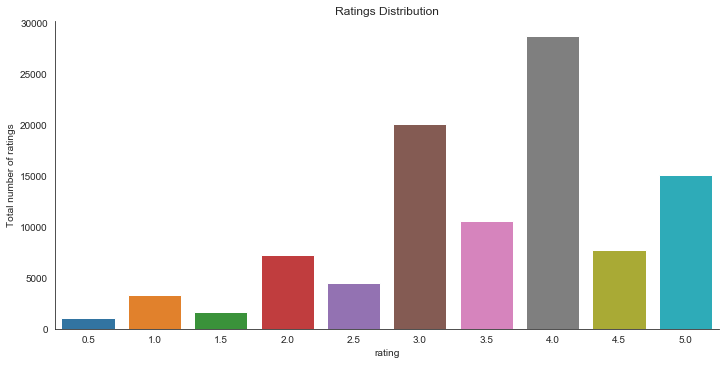

Average rating in dataset: 3.543608255669773


In [9]:
with sns.axes_style('white'):
    g = sns.catplot(x="rating", data=df1, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
    plt.title("Ratings Distribution")
    plt.show()
print (f'Average rating in dataset: {np.mean(df1["rating"])}')

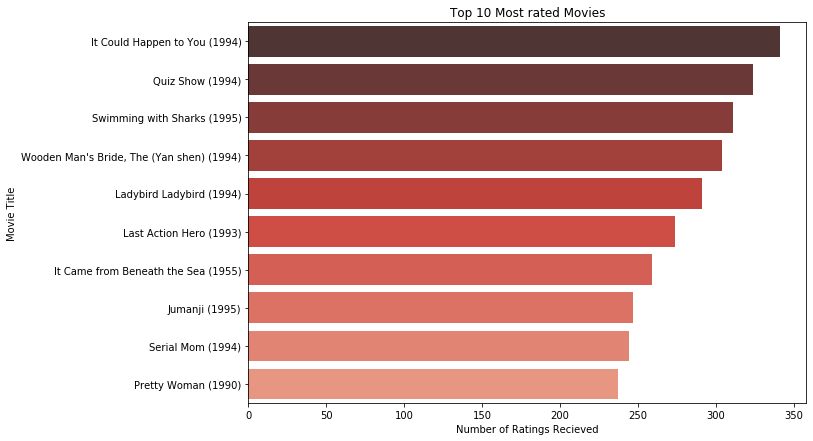

In [10]:
fig, ax = plt.subplots(figsize = (10, 7))
data = df1['movieId'].value_counts().sort_values(ascending=False)[0:10]
titles = [df2.loc[movieId, 'title'] for movieId in data.index]
sns.barplot(y=titles, x=data, ax=ax, palette="Reds_d")
plt.title('Top 10 Most rated Movies')
plt.ylabel("Movie Title")
plt.xlabel("Number of Ratings Recieved")
plt.show()

In [13]:
from collections import Counter

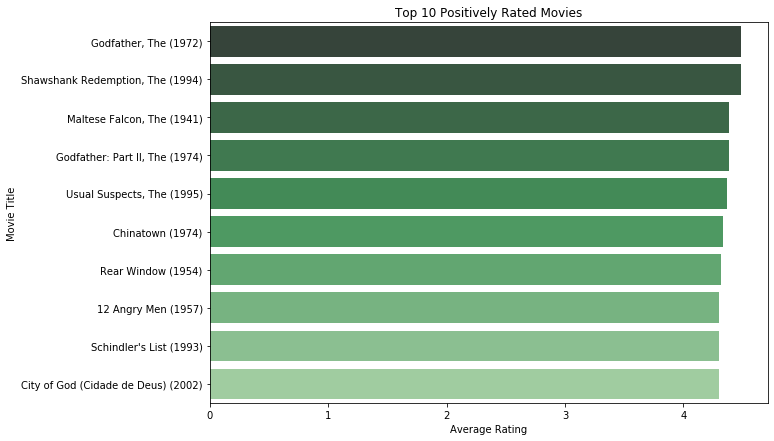

In [14]:
def most_popular(start, stop):
    # filter out movies with less than 50 ratings
    movies_per_rating = dict(Counter(df1.movieId))
    required_movies = []
    for key, value in movies_per_rating.items():
        if value > 50:
            required_movies.append(key)
    data = df1[df1['movieId'].isin(required_movies)]

    # calculating the average rating
    data = data.groupby('movieId')['rating'].mean().sort_values(ascending=False)[start:stop]
    return data

data = most_popular(0,10)

# ploting the 
fig, ax = plt.subplots(figsize = (10, 7))
index = [df2[df2['movieId'] == x].index for x in data.index]
titles = [df2[df2['movieId'] == movieId]['title'].iloc[0] for movieId in data.index]
sns.barplot(y=titles, x=data.values, ax=ax, palette="Greens_d")
plt.title('Top 10 Positively Rated Movies')
plt.ylabel("Movie Title")
plt.xlabel("Average Rating")
plt.show()

In [17]:
def extract_year(title):
    year = title.split('(')
    if len(year) > 1:
        try:
            year = int(year[1][0:4])
            if year > 1500:
                return year
        except:
            pass

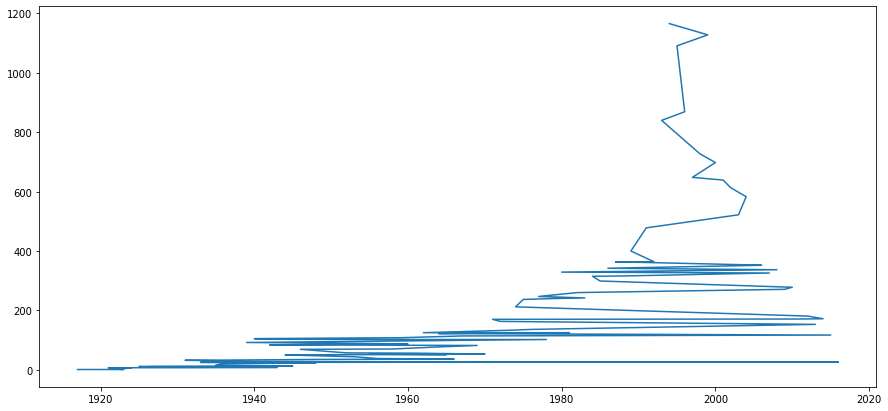

In [20]:
fig, ax = plt.subplots(figsize=(15, 7))
df_movies_high = df1[df1['rating'] >= 4.5]
movie_id_high = df_movies_high['movieId']
movie_title = df2.merge(movie_id_high)['title']
movie_date = movie_title.apply(extract_year)
movie_date = movie_date.value_counts()
movie = pd.DataFrame({'date':movie_date.index, 'count':movie_date.values})
movie['date'] = movie['date'].astype('int64')
movie['date'] = movie['date'].map(lambda x: pd.to_datetime(f'{x}-01-01'))
plt.plot(movie['date'], movie['count'])

In [21]:
def filter_low_rated_movies(df, min_no_rating):
    movies_per_rating = dict(Counter(df.movieId))
    required_movies = []
    
    for key, value in movies_per_rating.items():
        if value > min_no_rating:
            required_movies.append(key)
        
    return df[df['movieId'].isin(required_movies)]

In [24]:
df_filtered = filter_low_rated_movies(df1, 2500)

print("The old dataset has {} shape".format(df1.shape))
print("The dataset with low ratings removed has {} shape".format(df_filtered.shape))

The old dataset has (100004, 4) shape
The dataset with low ratings removed has (0, 4) shape


In [25]:
def filter_low_rating_users(df, min_no_rating):
    users_per_rating = dict(Counter(df.userId))
    required_users = []
    
    for key, value in users_per_rating.items():
        if value > min_no_rating:
            required_users.append(key)
        
    return df[df['userId'].isin(required_users)]

In [26]:
df_cleaned = filter_low_rating_users(df_filtered, 250)

print("The dataset with low rating users removed has {} shape".format(df_cleaned.shape))

The dataset with low rating users removed has (0, 4) shape


In [27]:
df1.sort_values("userId")
df2.sort_values("movieId")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [28]:
df2["movieId"].value_counts()

133119    1
166788    1
80818     1
205745    1
76720     1
         ..
50802     1
56945     1
142959    1
140910    1
131072    1
Name: movieId, Length: 62423, dtype: int64

In [29]:
df = pd.merge(df1,df2,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [30]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2


In [31]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,42
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,42
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,42
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,42
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,42


In [32]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   8860.000
mean      11.237
std       24.287
min        1.000
25%        1.000
50%        3.000
75%       10.000
max      341.000
Name: totalRatingCount, dtype: float64


In [33]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head(10)

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
351,1,1339,3.500,1260759125,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
352,15,1339,2.000,1134521654,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
353,19,1339,3.000,855192773,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
354,22,1339,4.500,1131663305,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
355,30,1339,4.000,945121560,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
356,34,1339,4.000,973747964,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
357,73,1339,3.000,1255500860,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
358,81,1339,1.500,1307169246,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
359,95,1339,5.000,1019023054,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52
360,102,1339,3.000,957980250,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller,52


In [34]:
rating_popular_movie.shape

(43083, 7)

In [35]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
28 Days Later (2002),0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [36]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [37]:
movie_features_df.shape

(453, 670)

In [38]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

271


In [39]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
28 Days Later (2002),0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Meet the Parents (2000):

1: American Pie (1999), with distance of 0.49793270005141843:
2: Ocean's Eleven (2001), with distance of 0.5055278837550906:
3: Austin Powers: International Man of Mystery (1997), with distance of 0.5198970256369441:
4: Truman Show, The (1998), with distance of 0.5237496435226359:
